In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import seaborn as sb


# Prosper Loan Data Exploaration by Merri Nalbandyan

 What factors affect loan’s amount ?

In [7]:
loan_data=pd.read_csv('clean_loan.csv')

# Univariate analyses
## Occupation

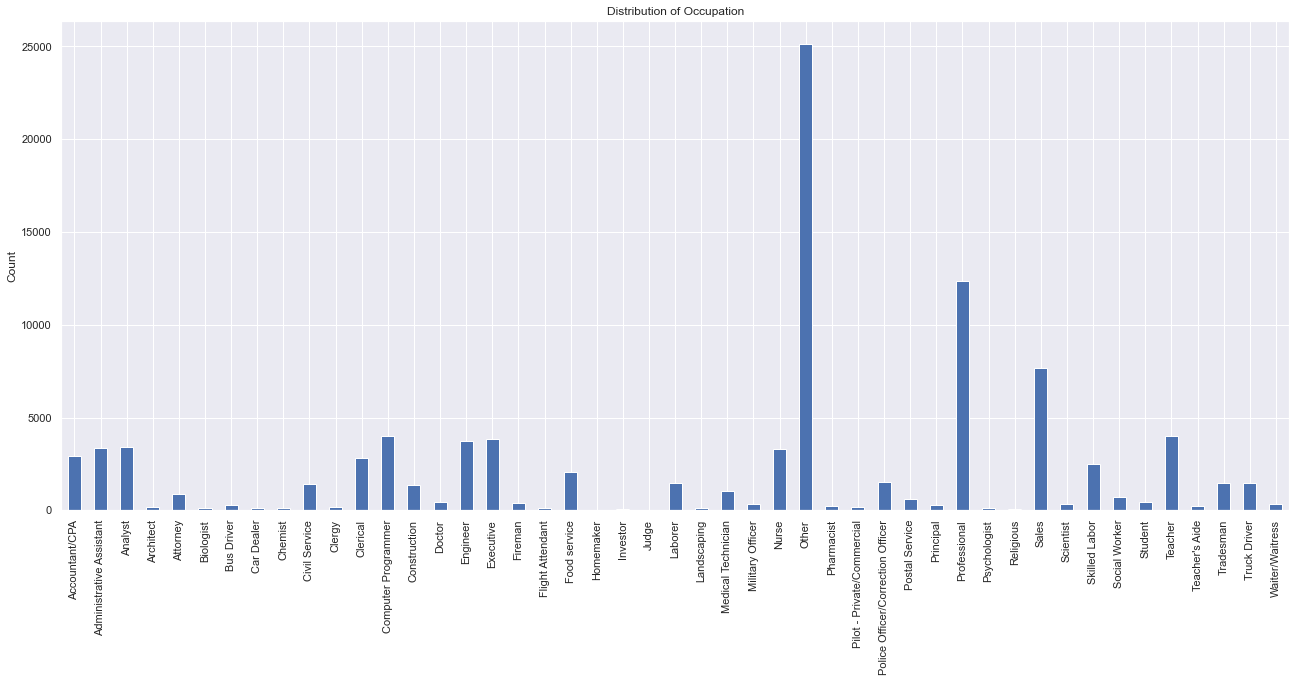

In [8]:
plt.figure(figsize=(22,9))
loan_data['Occupation'].value_counts().sort_index().plot.bar()
plt.ylabel('Count')
plt.title('Distribution of Occupation')
plt.show()

This graph shows that the most occured occupations are professionals teacher, executives, computer programmers

#  Occupation with 10 least count

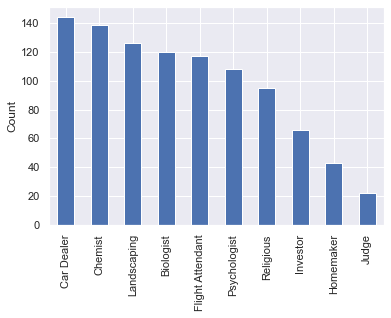

In [12]:
(loan_data['Occupation'].value_counts().tail(10).plot.bar())
plt.ylabel('Count')
plt.show()
#see the smallest counts of occupations

The least loans were taken by judges 

## Loan Status

Text(0.5, 1.0, 'Distribution of Loan status')

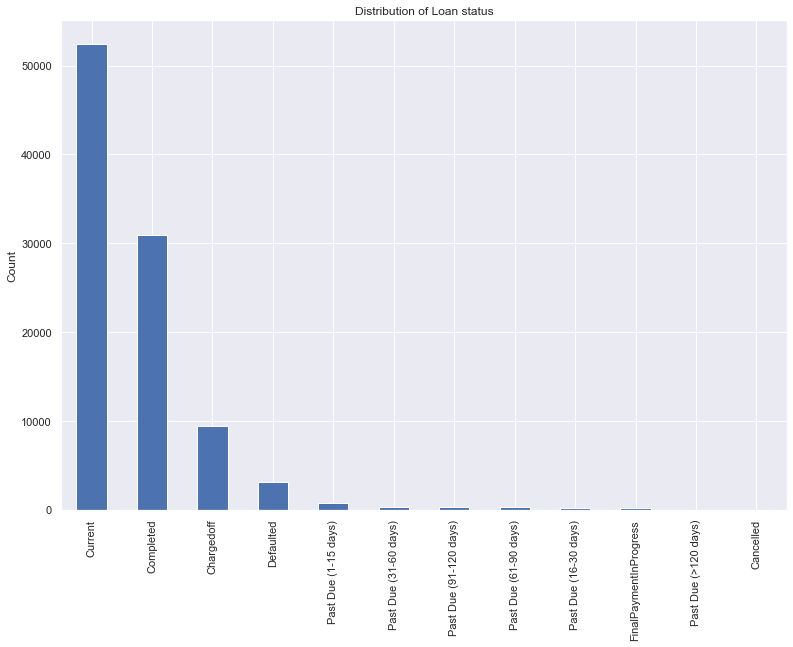

In [43]:
#count plot for Distribution of Loan status
plt.figure(figsize=(13,9))
loan_data['LoanStatus'].value_counts().plot(kind='bar')
plt.ylabel('Count')

plt.title('Distribution of Loan status')

We see that most of the loans are current they are not closed yet. so plus the second highest loans are the ones which have been completed.

## IncomeRange

Text(0.5, 1.0, 'Distribution of Income Rnage')

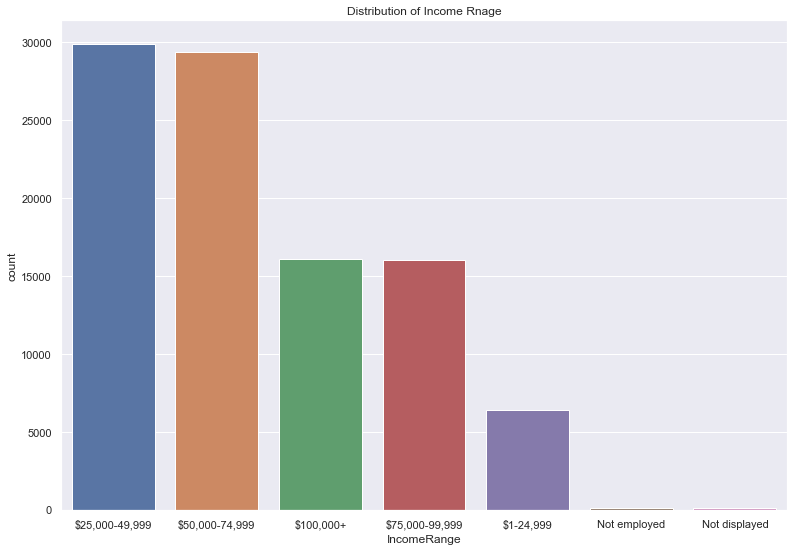

In [10]:
plt.figure(figsize=(13,9))
ax = sns.countplot(x="IncomeRange", data=loan_data)
plt.title('Distribution of Income Rnage')

Here we see that the people taking loans mostly the range of their income is between 25-49000$ the greater their income the less loan they take. Poeple who do not work are almost not given loans.

## Monthly Loan Payment

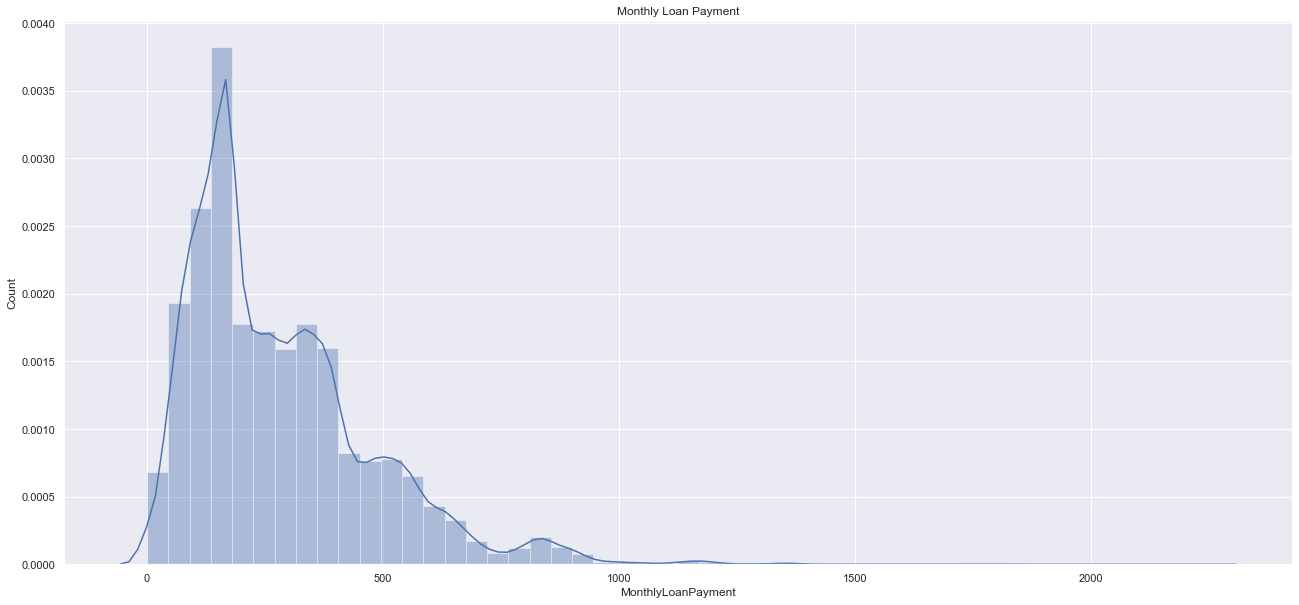

In [71]:
plt.figure(figsize=(22,10))
sns.distplot(loan_data["MonthlyLoanPayment"])
plt.title('Monthly Loan Payment')
plt.ylabel('Count')
plt.show()

We see that the distribution is normal and right skewed. It has one evident peak around 130. The range is between 0 to 1000.

## Loan Original Amount

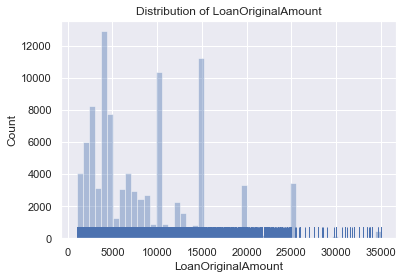

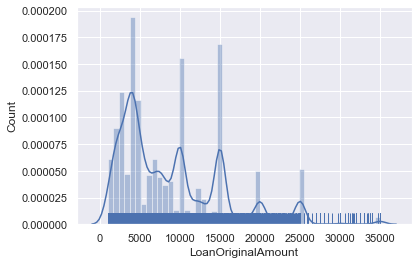

In [72]:
sns.distplot(loan_data['LoanOriginalAmount'], kde=False, rug=True)
plt.ylabel('Count')
plt.title('Distribution of LoanOriginalAmount')
plt.show()
sns.distplot(loan_data['LoanOriginalAmount'], rug=True)
plt.ylabel('Count')
plt.show()

It has several peaks

## Start Year

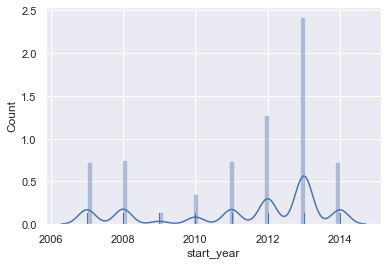

In [73]:
sns.distplot(loan_data['start_year'], rug=True)
plt.ylabel("Count")
plt.show()

The most loans were given in 2013. The loans amount were given more by more after each year till 2014 when they have

## Start Month

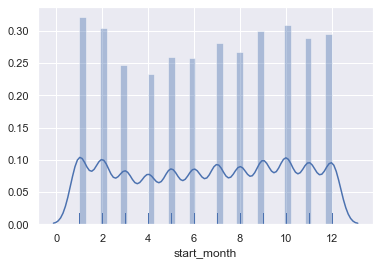

In [74]:
sns.distplot(loan_data['start_month'], rug=True)
plt.show()

 The most loans were given in january and october and the least in April

## Borrower Rate

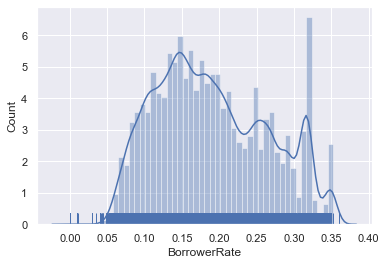

In [75]:
sns.distplot(loan_data['BorrowerRate'], rug=True)
plt.ylabel("Count")
plt.show()

 This is a normal distribution we can see that the most values lie around the 0.15 and there is a peak between 0.30 to 0.34.

## Prosper Rating (Alpha)

<Figure size 3600x1440 with 0 Axes>

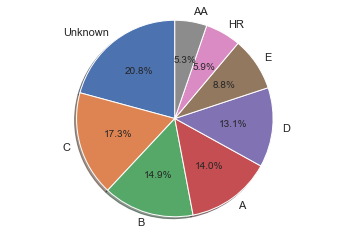

<Figure size 1440x1440 with 0 Axes>

In [76]:
plt.figure(figsize=(50,20))
count_alpha= loan_data["ProsperRating (Alpha)"].value_counts()
label=["Unknown","C","B","A","D","E","HR","AA"]
fig1, ax1 = plt.subplots()
plt.figure(figsize=(20,20))
ax1.pie(count_alpha, autopct='%1.1f%%',shadow=True, startangle=90,labels=label)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

What comes to the prosper rating we see that unkown rates have the most share. The second biggest proportion loans have been given a rate of 'C', and then 'B'. 'AA' has been given to very few loans only to 5.1%

# Bivariate

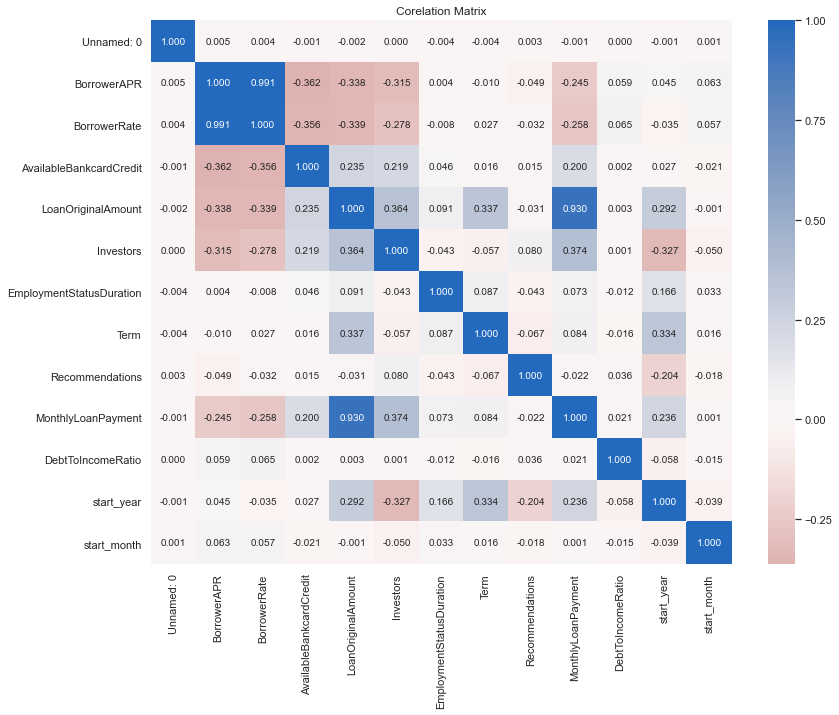

In [77]:
plt.figure(figsize = [13, 10])
sns.heatmap(loan_data.corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.title("Corelation Matrix")
plt.show()

This shows that Loan original amount is correlated onegatively to borrower apr and postively to monthly loan payment and to investors

## Loan Original Amount vs Monthly Loan Payment

D:\anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


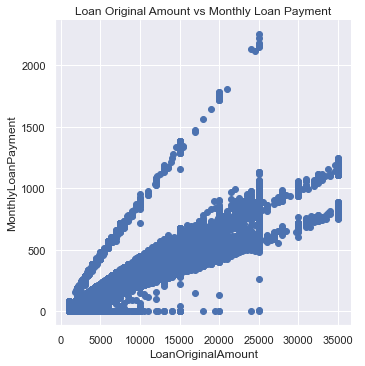

In [99]:
sns.FacetGrid(loan_data,size=5).map(plt.scatter,"LoanOriginalAmount",'MonthlyLoanPayment').add_legend()
plt.title("Loan Original Amount vs Monthly Loan Payment")
plt.show()

Loan amount and montly loan payments are positievly related.

##  Investors vs Loan Original Amount

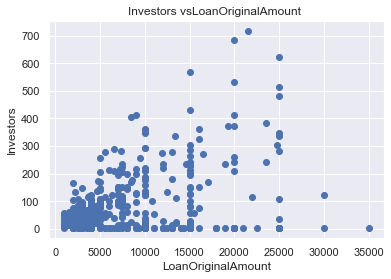

In [79]:
datalim=loan_data[:500]  # to have less data points
plt.scatter(datalim["LoanOriginalAmount"],datalim["Investors"])
plt.ylabel('Investors')
plt.xlabel('LoanOriginalAmount')
plt.title('Investors vsLoanOriginalAmount ')
plt.show()

30000 and 35000 loan amounts are outliers other than that these two variables are positevely correlated though not so much

## Pair PLot of Variables

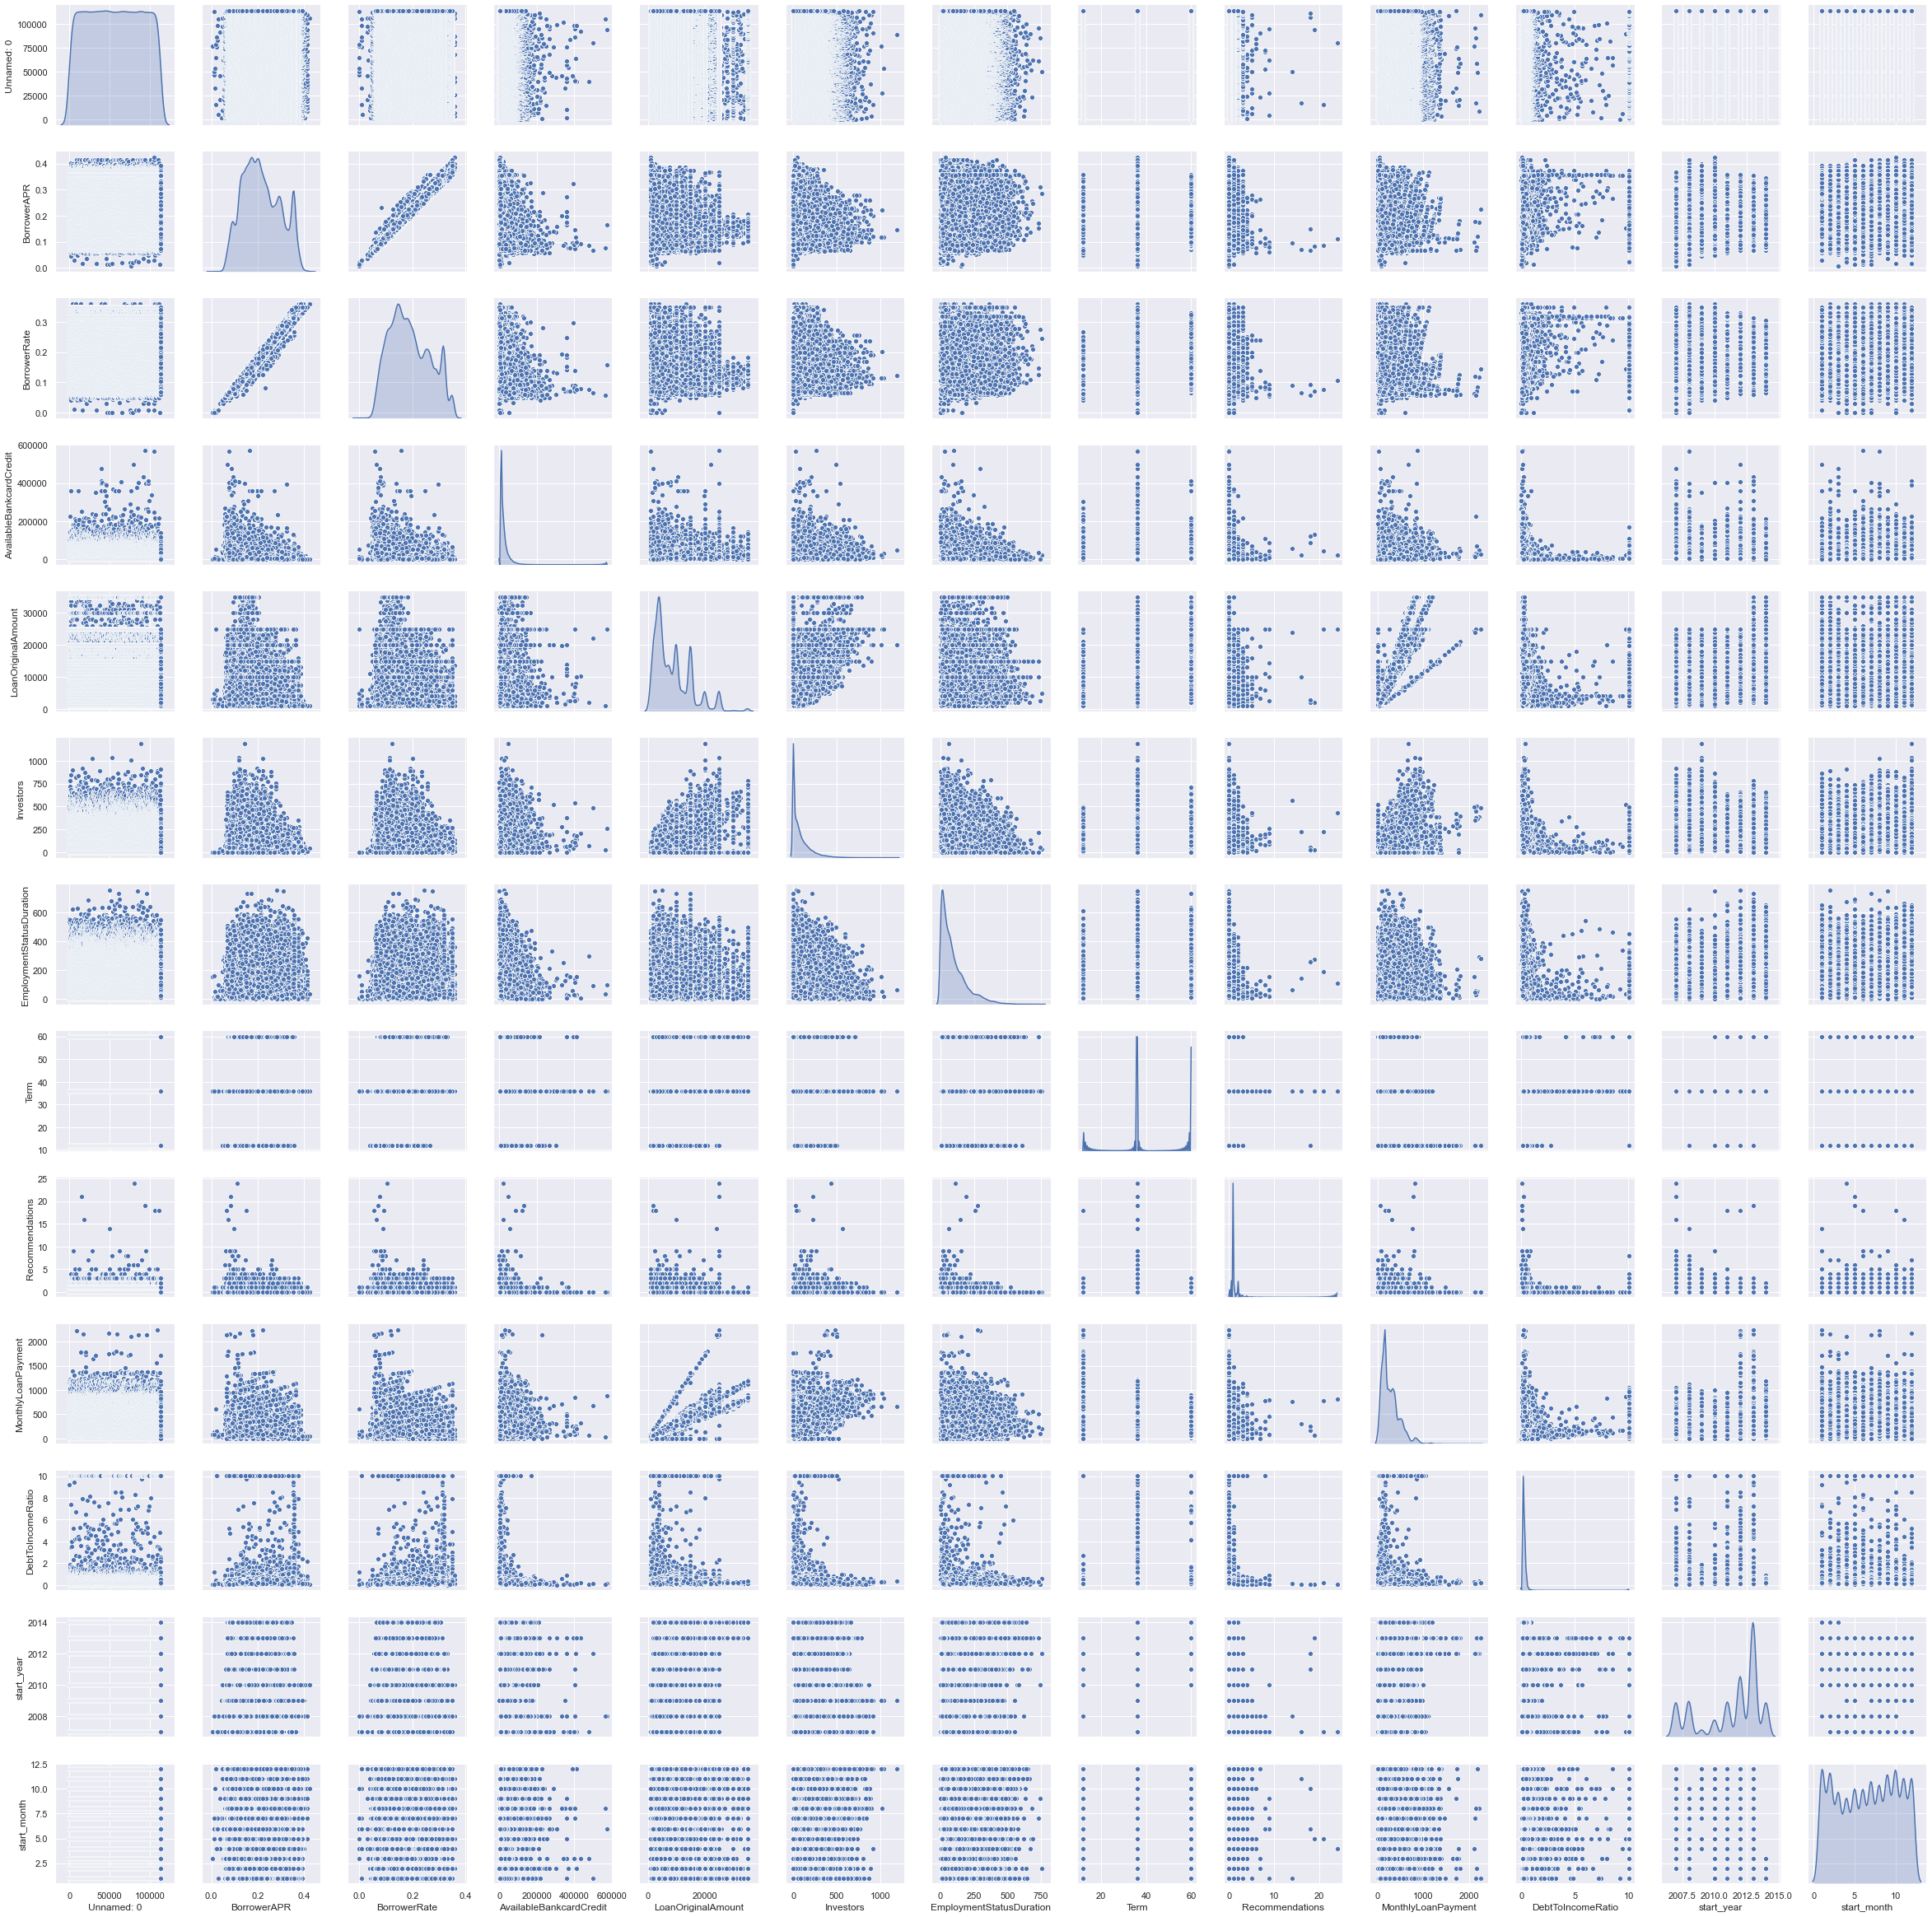

In [102]:
#cross plots

sns.pairplot(loan_data, diag_kind='kde');

1. Employment Status duration vs Available bank credit. So the people with longer durtion of work have  less bank credit.
Investors vs Available bank credit. Having higher number of investors means  low bank credit.
2; Loan original amount vs start_year. The most loans have been in given in the years of 2014 and 2013. And the othe ryears have the similar loan amount.
3. Debt to income Ration vs Loan amount: When debt ratio is higher the loan amount given is lower. They are negatively correlated. 
4. Debt to income ratio vs investors. We see that these two variables are also negatively correlated and  higher the debt income ration the lower the investors.
5. Debt to income ratio vs status duration. These two variables are negatively correlated too. The higher the debt to income ratio the lower the employee status duration. So the people who have more working experience have less debts.
  


## BOX PLOT of BorrowerAPR,Term, ProsperRating (Alpha) 

<Figure size 720x720 with 0 Axes>

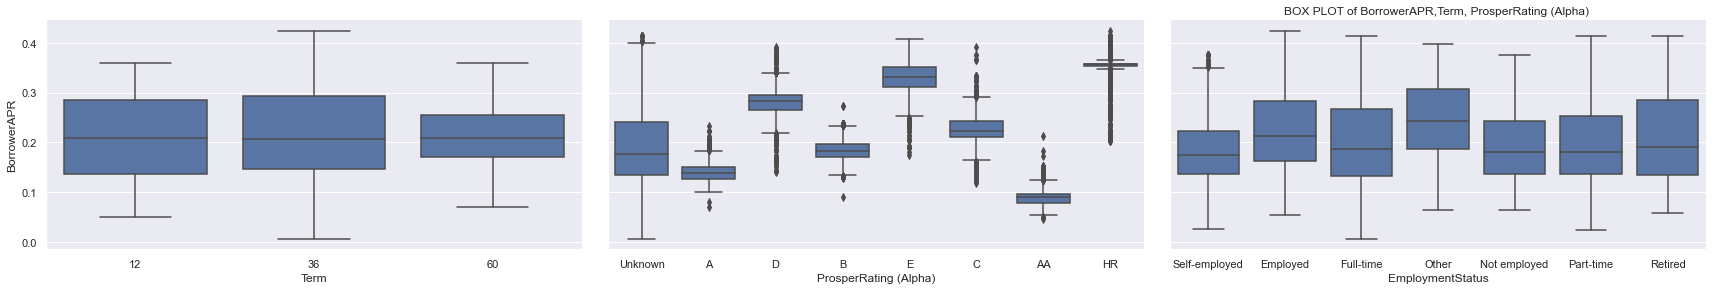

In [81]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = loan_data, y_vars = ['BorrowerAPR'], 
                x_vars = ['Term','ProsperRating (Alpha)', 'EmploymentStatus'], height = 4, aspect = 2)
g.map(boxgrid)
plt.title("BOX PLOT of BorrowerAPR,Term, ProsperRating (Alpha) ")
plt.show();


1. While we compare APR with the term it is not chnaging as the medians of the box plots stay similar.
2. Employment vs Borrower APR: we can see that non employeed people have the highest borrower APR and full time and part time workers have the lowest Borrower APR;
3. Prosper rating vs Borrower APR: It can be seen that AA has the lowest APR so this means they are negatively correlated. The higher the Prosper Rating the lower the Borrower APR

##  LoanOriginalAmount vs Term ,ProsperRating (Alpha), EmploymentStatus

<Figure size 720x720 with 0 Axes>

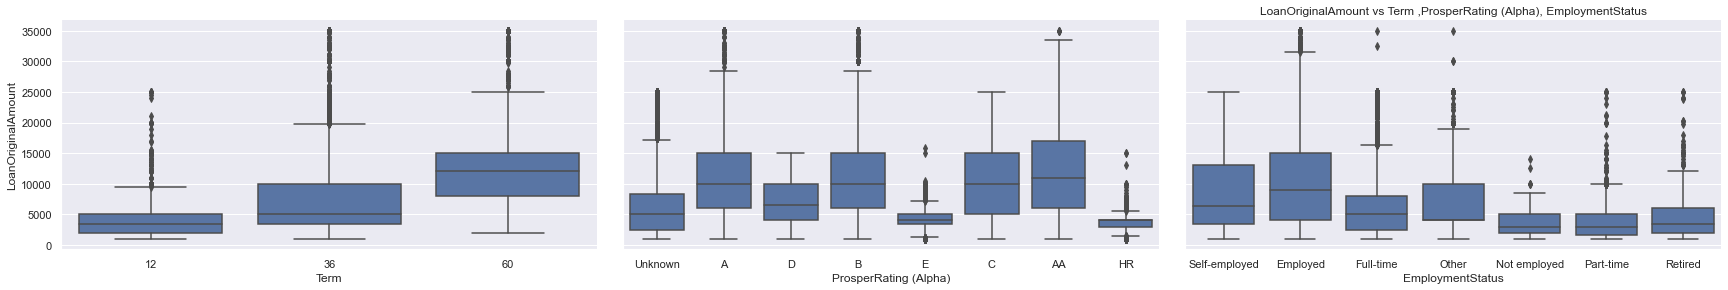

In [82]:
plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = loan_data, y_vars = ['LoanOriginalAmount'], 
                x_vars = ['Term','ProsperRating (Alpha)', 'EmploymentStatus'], height = 4, aspect = 2)
g.map(boxgrid)
plt.title('LoanOriginalAmount vs Term ,ProsperRating (Alpha), EmploymentStatus')
plt.show();

1. Term vs Loan amount: With the increase of term the loan amount also increases. They have some positive correlation
2. Loan AMount vs Prosper Rating:  For AA and A,C the highest loan aount is given, for E, HR, Unknown the least loan amount is given. This can mean they are correlated.
3. Most loan amount are given to employed people and the least is to non employed and part time workers

## LoanStatus by hue

Text(0.5, 1.0, 'LoanStatus by hue')

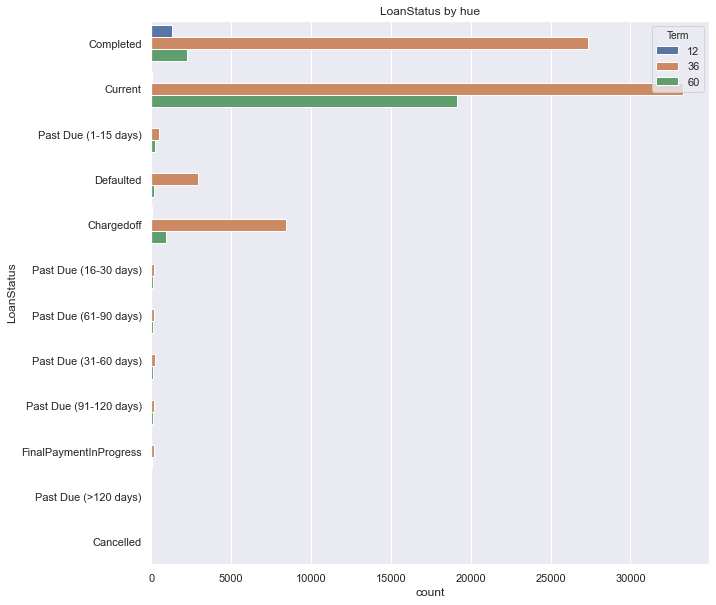

In [83]:
plt.figure(figsize=[10, 10])
sb.countplot(y='LoanStatus', hue='Term', data=loan_data)
plt.title('LoanStatus by hue')

So the loan for 36 months has mostly current status and secondly it has completed status. 60 months loans are having mostly current status and the second highest number of 60 months loans has been completed already

## LoanStatus by start year

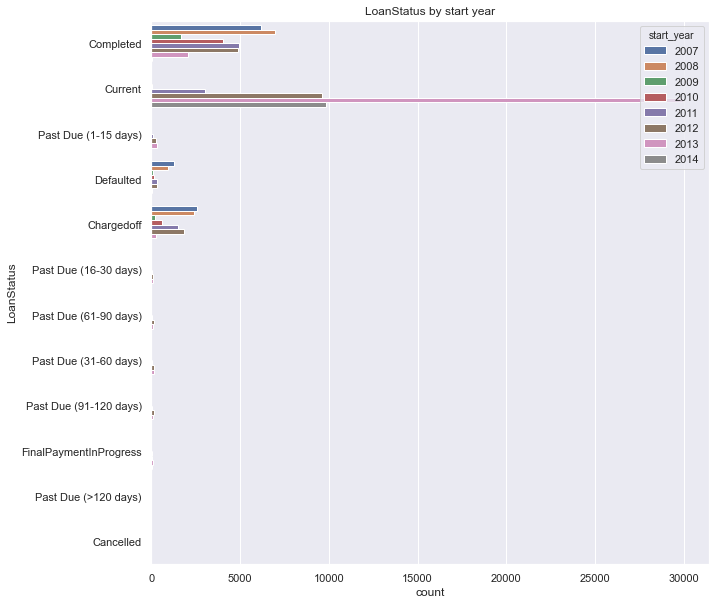

In [84]:
plt.figure(figsize=[10, 10])
plt.title('LoanStatus by start year')
sb.countplot(y='LoanStatus', hue='start_year', data=loan_data)

Current Loans have been mostly given in the year of the 2013.And for the completed loans they have been given mostly in 2008. 

## loan status by ProsperRating (Alpha) 

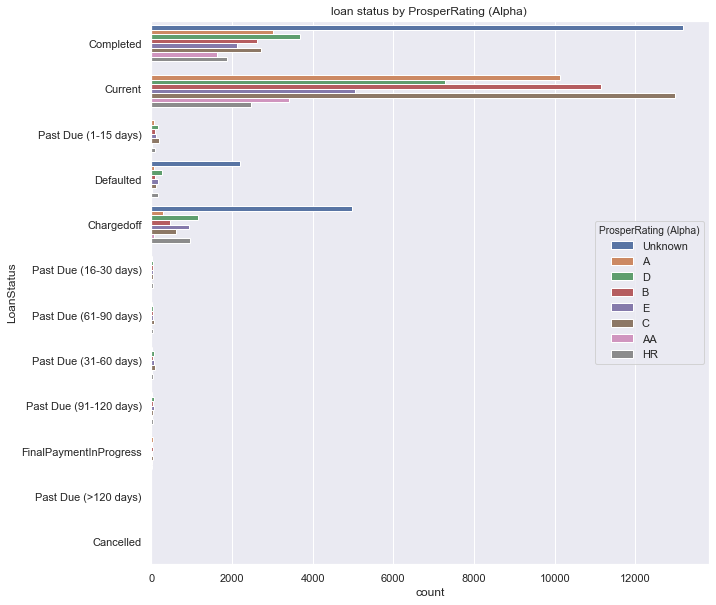

In [85]:
plt.figure(figsize=[10, 10])
plt.title('loan status by ProsperRating (Alpha) ')
sb.countplot(y='LoanStatus', hue='ProsperRating (Alpha)', data=loan_data)

Most of the current loans were given a C rating and secondly a B rating.For the completed loans most of the ratings are unknown, secondly they have been given D rating.

## Loan Status vs Loan Original Amount

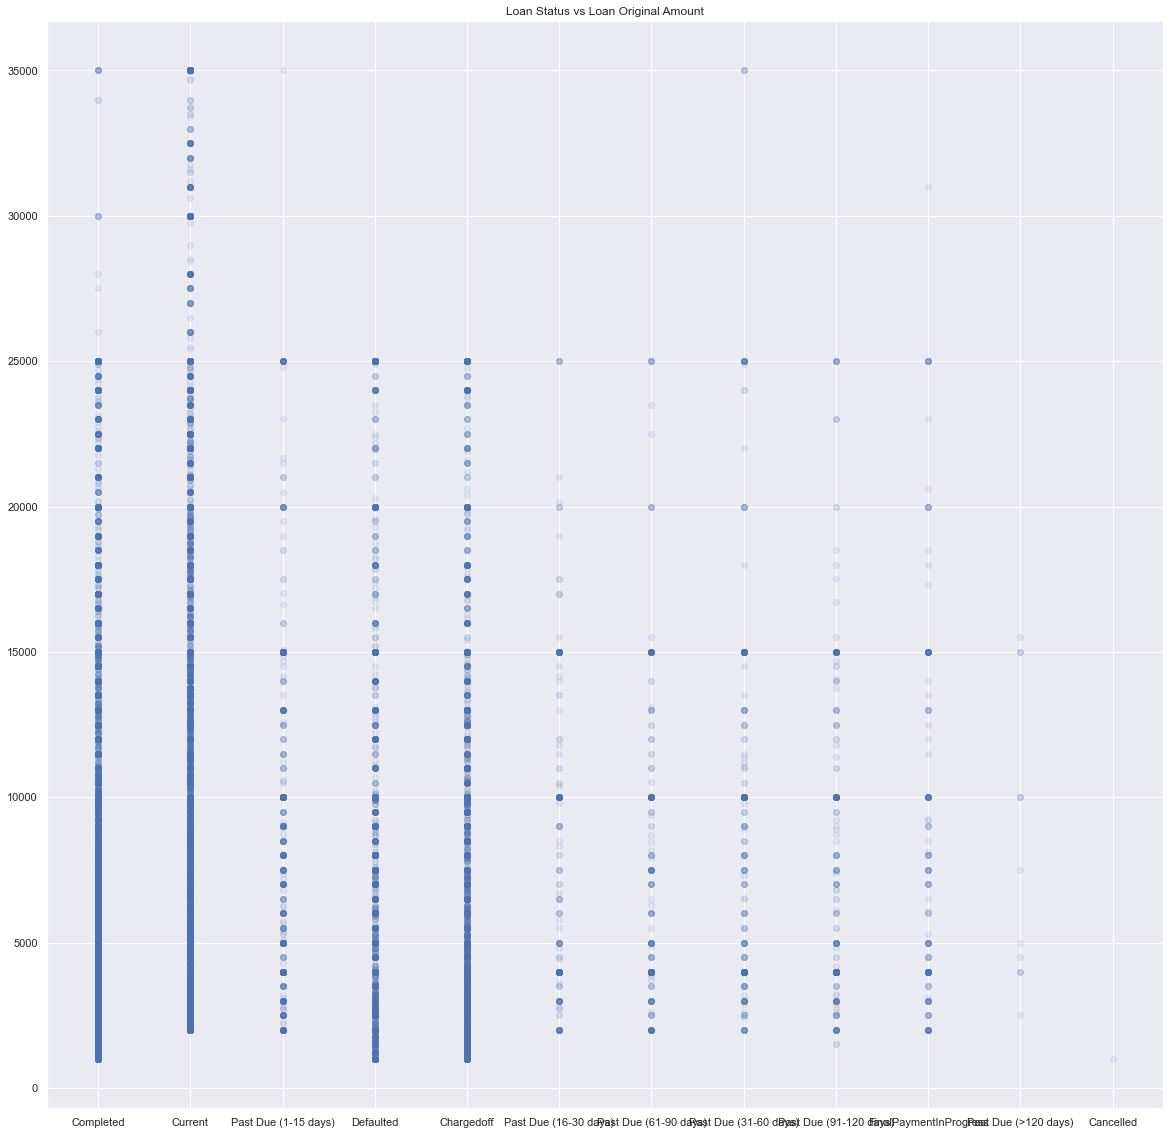

In [86]:
plt.figure(figsize = [20, 20])
plt.scatter(data = loan_data, x = 'LoanStatus', y = 'LoanOriginalAmount', alpha = 1/10)
plt.title('Loan Status vs Loan Original Amount')
plt.show()

 Current has larger loan amount >35K.most of the loans which are defaulted have loan amount >25K; I assume that the current loan  given have higher amounts than the completed ones.

## Loan Original Amount vs ProsperRating (Alpha)

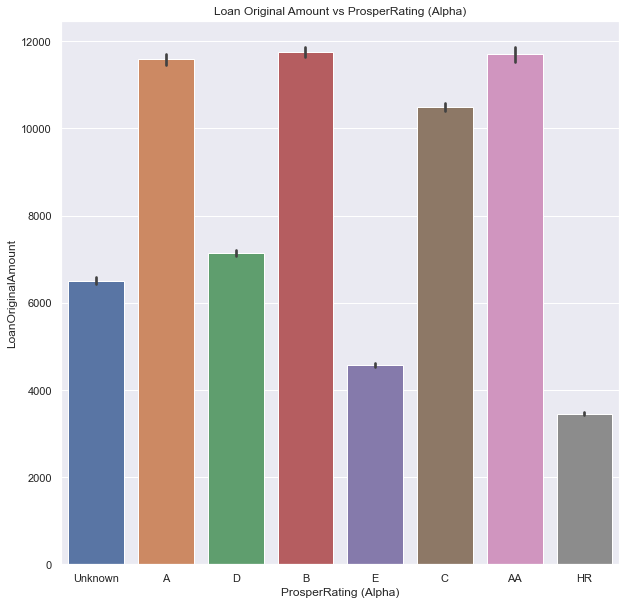

In [87]:
plt.figure(figsize=[10, 10])
sb.barplot(y='LoanOriginalAmount', x='ProsperRating (Alpha)', data=loan_data)
plt.title('Loan Original Amount vs ProsperRating (Alpha)')
plt.show()

The maximum loan amounts were given to A B and to AA. HR  and E have the lowest amount

##  AvailableBankcardCredit vs LoanOriginalAmount

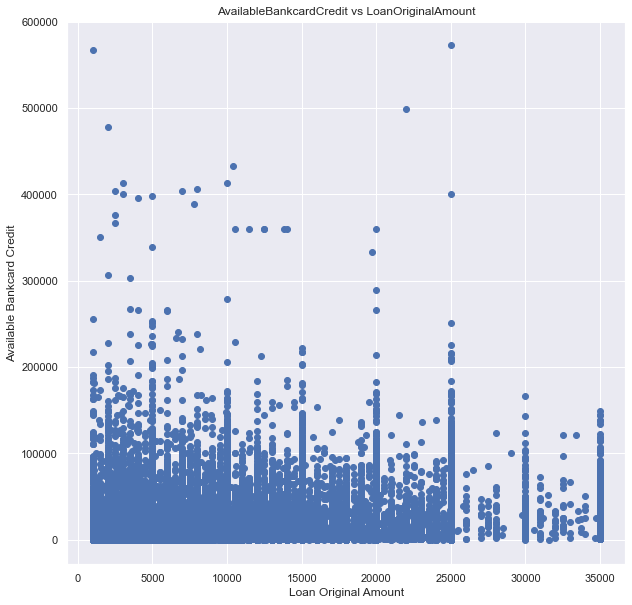

In [88]:
plt.figure(figsize = [10, 10])
plt.scatter(data = loan_data, y = 'AvailableBankcardCredit', x = 'LoanOriginalAmount')
plt.ylabel('Available Bankcard Credit')
plt.xlabel("Loan Original Amount")
plt.title('AvailableBankcardCredit vs LoanOriginalAmount')
plt.show()

The people who have less credit amount take more loans. 

##  BorrowerAPR vs LoanOriginalAmount

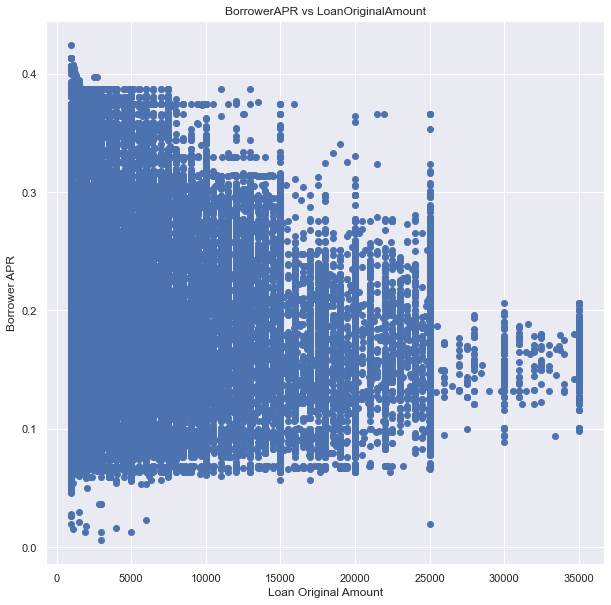

In [89]:
plt.figure(figsize = [10, 10])
plt.scatter(data = loan_data, y = 'BorrowerAPR', x = 'LoanOriginalAmount')
plt.ylabel("Borrower APR")
plt.xlabel("Loan Original Amount")
plt.title('BorrowerAPR vs LoanOriginalAmount')
plt.show()

The highest APR  is for the  lowest loan amount

## BorrowerRate vs LoanOriginalAmount

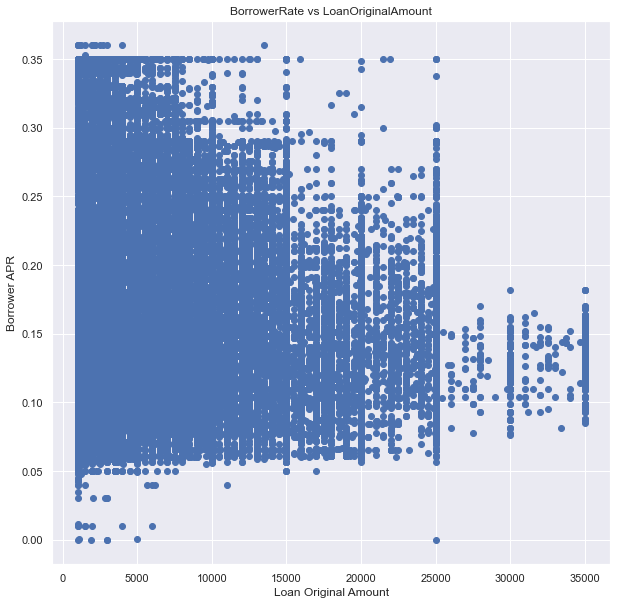

In [90]:
plt.figure(figsize = [10, 10])
plt.scatter(data = loan_data, y = 'BorrowerRate', x = 'LoanOriginalAmount')
plt.ylabel("Borrower APR")
plt.xlabel("Loan Original Amount")
plt.title('BorrowerRate vs LoanOriginalAmount')
plt.show()

There is a similar impact of the BorrowerRate and borrowerAPR on the loan amount. They both are higher when the loan amount is lower.


## EmploymentStatus by LoanStatus

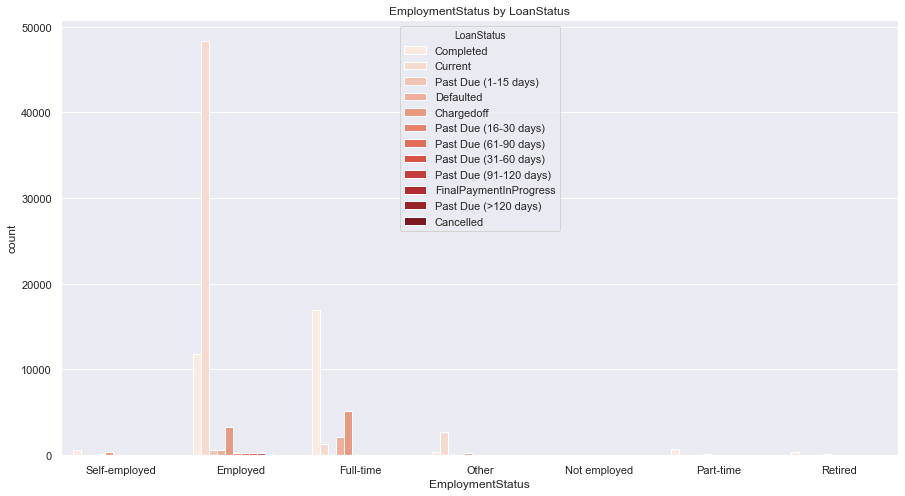

In [91]:
plt.figure(figsize = [15, 8])
# subplot 1: color vs cut
plt.title('EmploymentStatus by LoanStatus')
sb.countplot(data = loan_data, x = 'EmploymentStatus', hue = 'LoanStatus', palette = 'Reds')


Most of the Emplyed people have current loan status and the second largest staus is the completed. So we can conclude that Employed people have less non paid loans. Most of the loans completed are by full_time eployees. the other were given less loans or not given at all.

## LoanOriginalAmount vs EmploymentStatus 

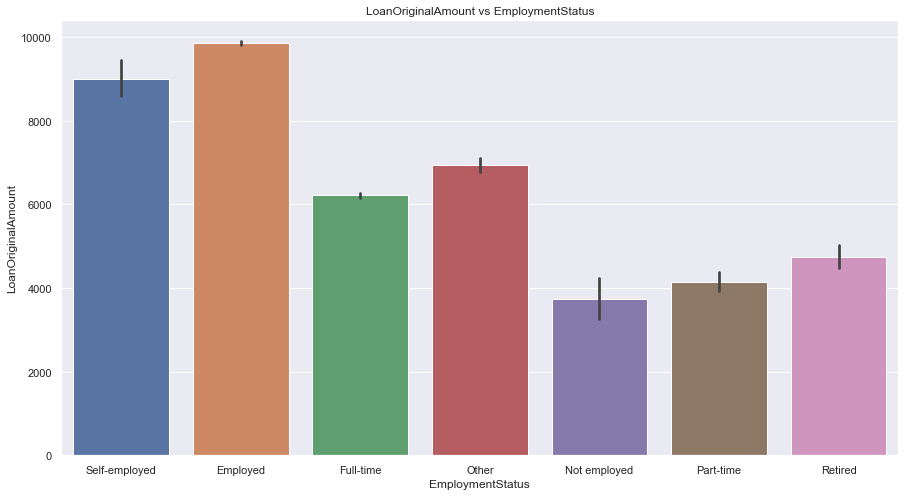

In [92]:

plt.figure(figsize = [15, 8])
plt.title('LoanOriginalAmount vs EmploymentStatus')
# subplot 1: color vs cut
sb.barplot(data = loan_data, y = 'LoanOriginalAmount', x = 'EmploymentStatus')
plt.show()

The people who are employed get the highest loan amounts. Self employeed people get the second highest loan amounts. Part time workers get the lowest loans still I am surprised that not employeed people get more loans than part-time workers.

## Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

1. It is interesting to find out that the employed people get the highest loan amounts and the part time workers get the lowest loan amount. 
2. Loan Original amount is higher with the lowest APR this means they are negatively correlated. 
3. Borrower Rate is also negatively correlated to Loan AMount. LoanOriginalAmount' vs 'ProsperRating (Alpha) have positive correlations as the highest loan amount are given to people with the highest prosper Ratings.
4. Current has larger loan amount >35K.most of the loans which are defaulted have loan amount >25K;  The current loan given have higher amounts than the completed ones. 
5. And also the monthly loan payment is higher when the loan original amount is higher. They are defenetely positevely correlated.

## Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

 1. Most of the Emplyed people have current loan status and the second largest staus is the completed. So we can conclude that Employed people have less non paid loans. Most of the loans completed are by full_time eployees. the other were given less loans or not given at all.
2. Employment vs Borrower APR: we can see that non employeed people have the highest borrower APR and full time and part time workers have the lowest Borrower APR;
3. Prosper rating vs Borrower APR: It can be seen that AA has the lowest APR so this means they are negatively correlated. The higher the Prosper Rating the lower the Borrower APR.
4. Term VS APR: they are negatively correlated.
5. Debt to income ratio vs investors. they are negatively correlated
6. Debt to income ratio vs status duration. These two variables are negatively correlated too. The higher the debt to income ratio the lower the employee status duration. So the people who have more working experience have less debts.

# Multivariate Exploration

D:\anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


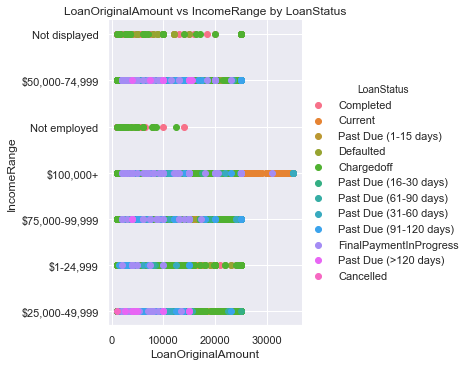

In [93]:
sns.FacetGrid(loan_data,hue="LoanStatus",size=5).map(plt.scatter,"LoanOriginalAmount",'IncomeRange').add_legend()
plt.title('LoanOriginalAmount vs IncomeRange by LoanStatus')
plt.show()

1. We can see here that the highest loan amount is given to people with an income range of 100K+. Inside it the loan amount bigger than 25K+ has the current status and under 25K they have mostly final payment progress status.
2. When the income range is between 25K-49K the loan amount given above 15K are chargedoff. They also have the most cancelled loan status below loan amount 10K;
3. The people with income of between 50K-74K mostly were GIVEN loans < 25K and mostly are not chargedoff.
4. The people with the range income between 75K-99K and are given < 15K loans are mostly in final payment process and above 15K they are mostly chargedoff or due.

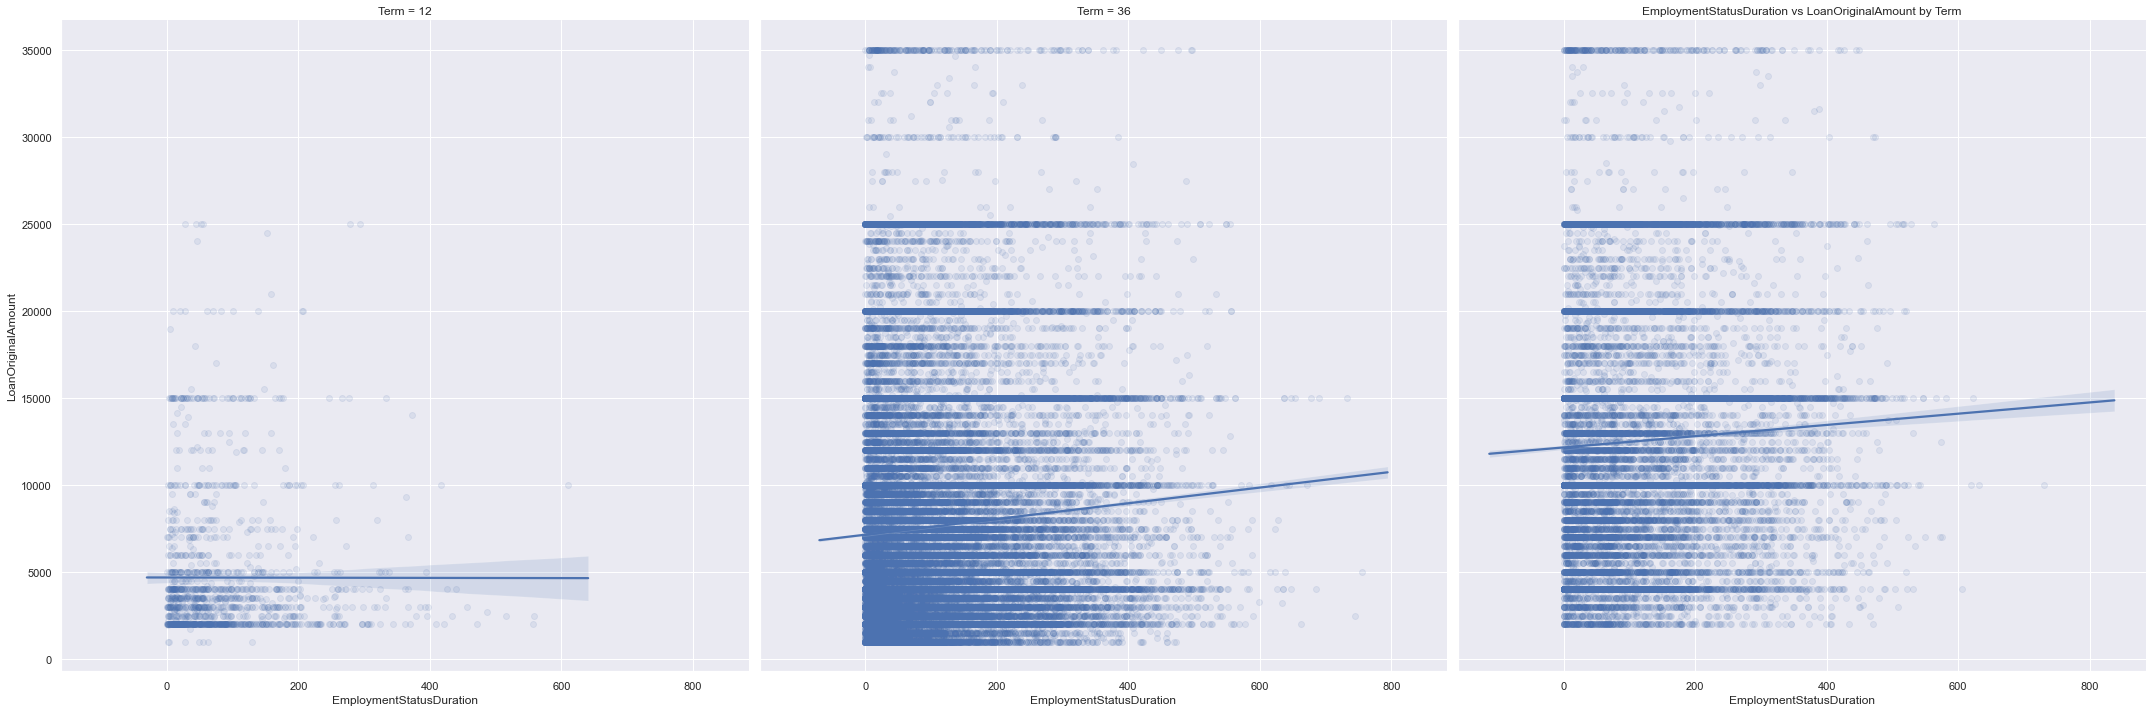

In [94]:
g = sb.FacetGrid(data = loan_data, col = 'Term',palette = 'colorblind',size=10)
g.map(sb.regplot, 'EmploymentStatusDuration', 'LoanOriginalAmount',x_jitter=0.04, scatter_kws={'alpha':0.1})
plt.title('EmploymentStatusDuration vs LoanOriginalAmount by Term')
plt.show()

1. For 12 month Employment duration does not matter for getting the loan.
2. For 36 and 60 months term there is a positive correlation between employment duration and loan amount.

D:\anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


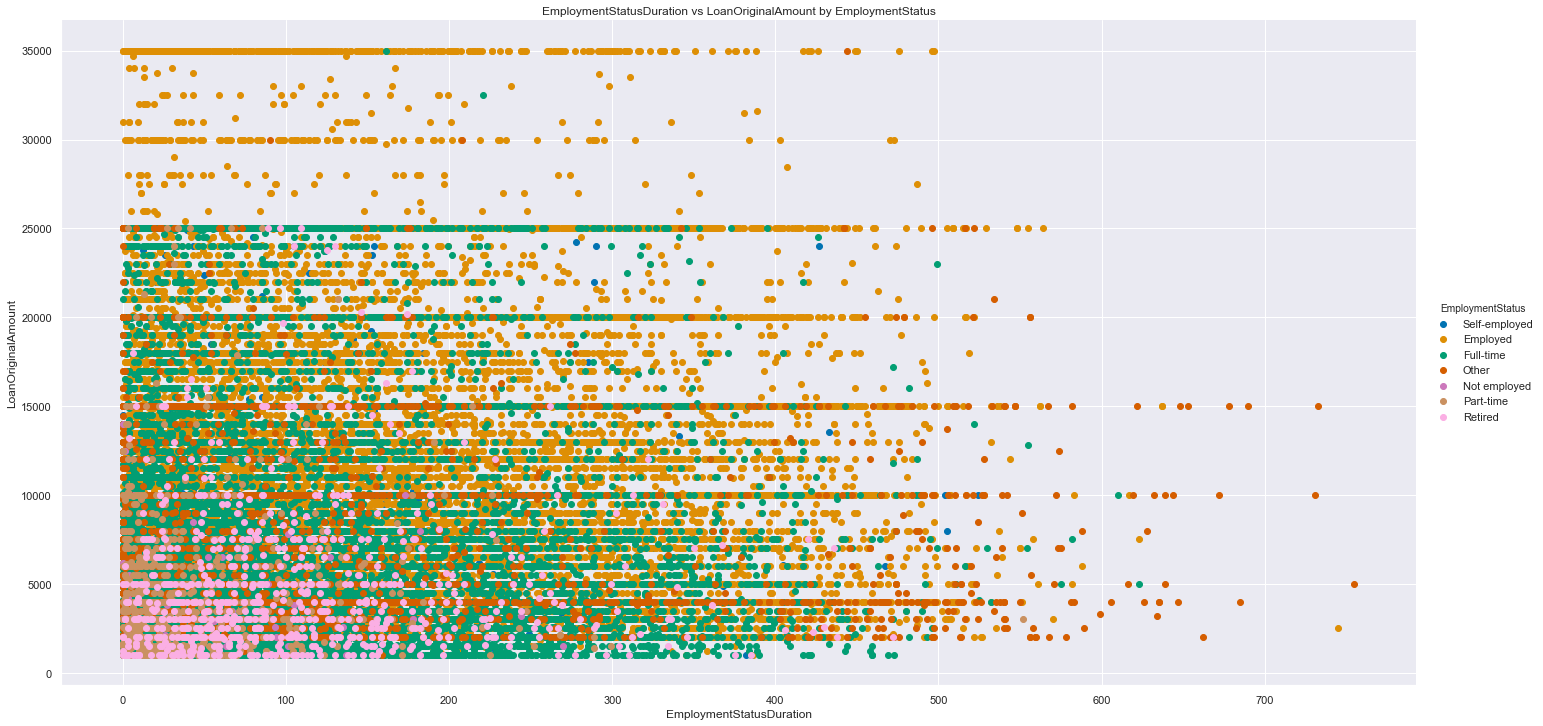

In [95]:
g = sb.FacetGrid(data = df, hue = 'EmploymentStatus', size = 10,
                 palette = 'colorblind',aspect=2)
g.map(plt.scatter, 'EmploymentStatusDuration', 'LoanOriginalAmount')
plt.title('EmploymentStatusDuration vs LoanOriginalAmount by EmploymentStatus')
g.add_legend()

1. It can be seen from this plot that retired pople have work up to 300 months and have taken a loan amount up to 10K.
2. Employeed people have taken the most loans, they work mostly up to 500 months and in the ration of loan amount from 25K-35K they have been given the most loans.
3. Part time workers have worked mostly up to 100 months and have been given mostly up to 10K loan amount.

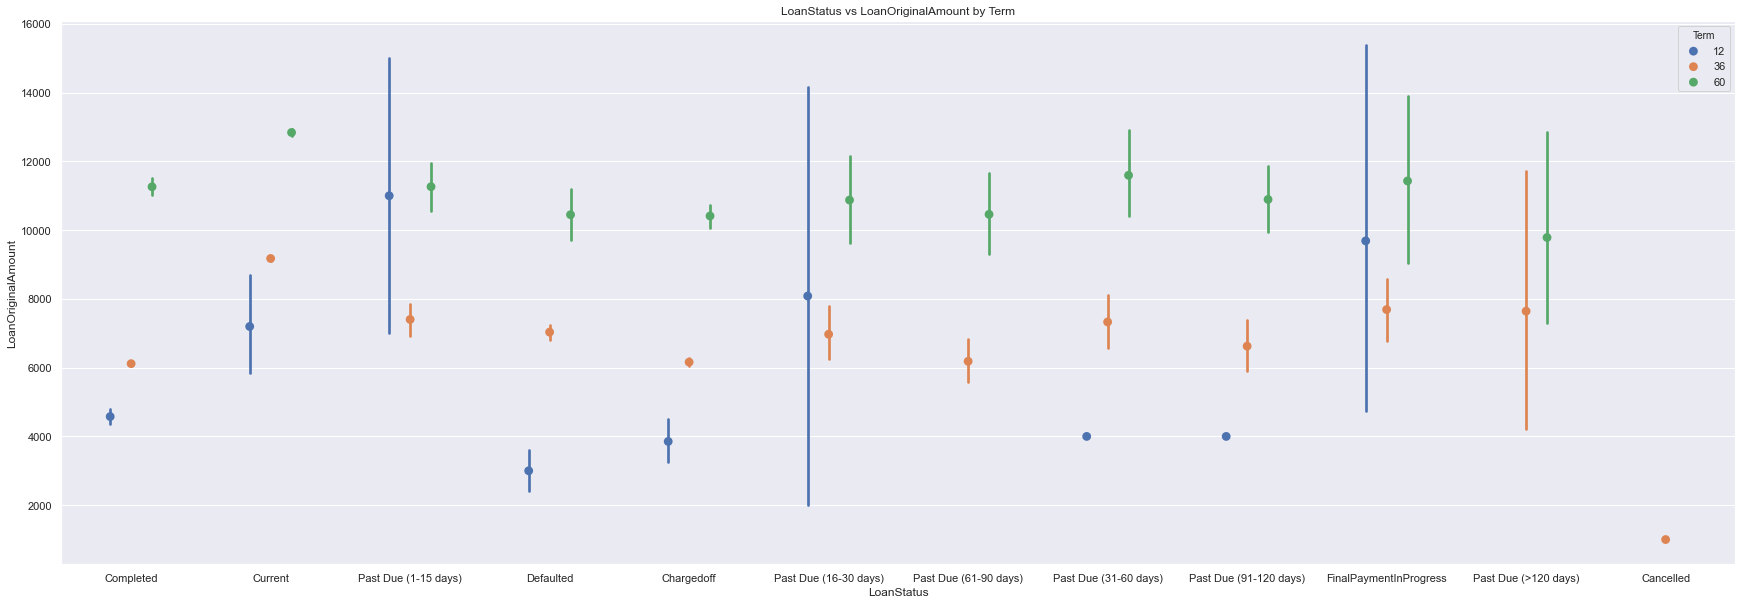

In [96]:
plt.figure(figsize = [30, 10])
plt.title('LoanStatus vs LoanOriginalAmount by Term')
ax = sb.pointplot(data = loan_data, x = 'LoanStatus', y = 'LoanOriginalAmount', hue = 'Term',
                  dodge = 0.3, linestyles = "")

1. As it can be seen the completed loans that have been give for 60 months had the loan amount >10K and the lowest amount was taken for the shortest period of time 12months.
2. The current loans for 12 months have the loan amount in the range of 6K-8.5K Again the highest amount to be paid are given with the largest periods.
3. Past due(1-15 days)  the largest loan amount taken is between 6.5K to 14.5 K and they were taken for 12 months.
4. Pople who did not pay the loan back for more than 2 years had a term of 60 and 36 months mostly.

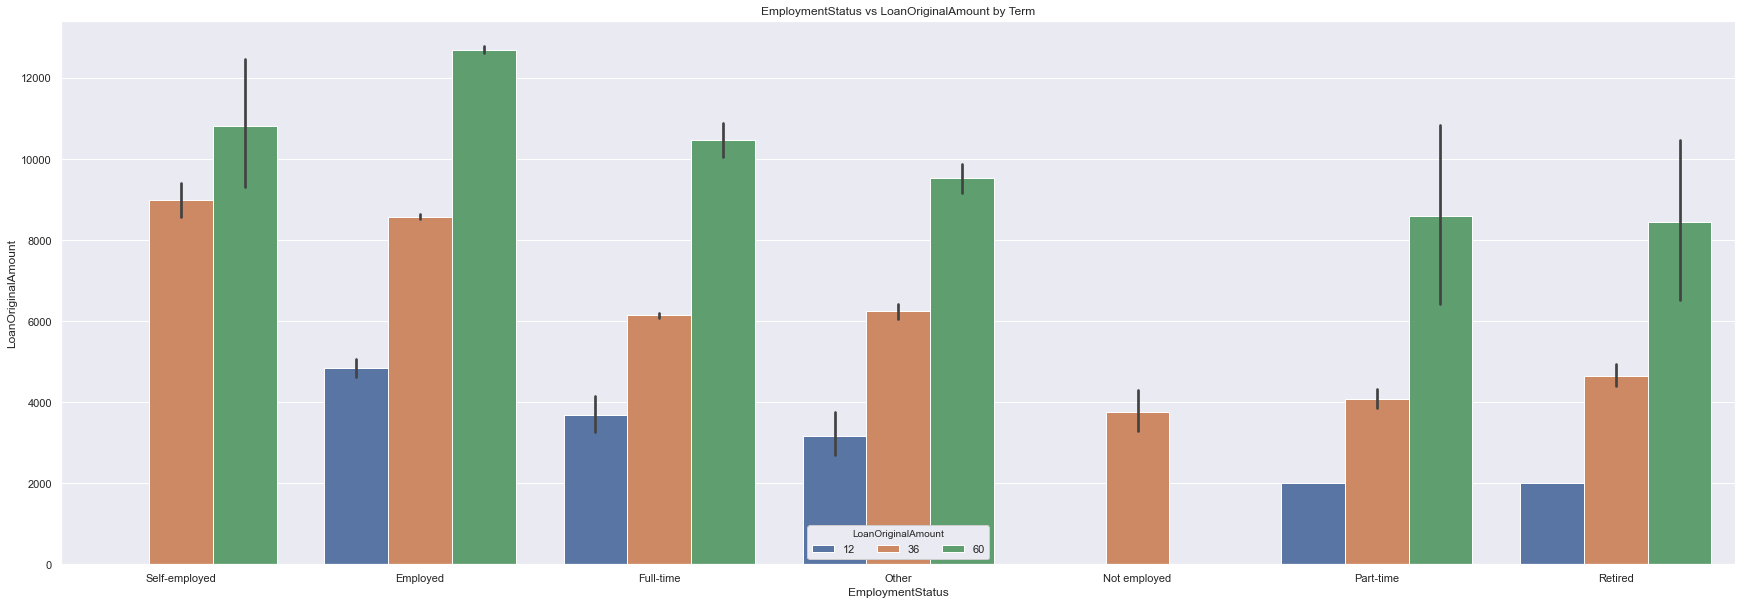

In [97]:
plt.figure(figsize = [30, 10])
ax = sb.barplot(data = loan_data, x = 'EmploymentStatus', y = 'LoanOriginalAmount', hue = 'Term')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'LoanOriginalAmount')
plt.title('EmploymentStatus vs LoanOriginalAmount by Term')
plt.show()

1. It is evident that the largest loan  amounts  are given for 60 months terms and for 12 months people are given less loan amount.
2. Self employed people never take a loan of 12 months.
3. Not epmloyeed people took a loan only for 36 month under 4000K

## Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest ?

## Were there any interesting or surprising interactions between features?

1. EmploymentStatusDuration vs LoanOriginalAmount by Term: It is surprising that  for 12 month TERM Employment duration does not matter for getting the loan.
2. LoanStatus vs LoanOriginalAmount by Term is also interesting as the current loans for 12 months have the loan amount in the range of 6K-8.5K Again the highest amount to be paid are given with the largest periods.Pople who did not pay the loan back for more than 2 years had a term of 60 and 36 months mostly.